# Neural Networks

**Objective**

To build an image classifier with a dense NN. We will be using the Fashion MNIST dataset [https://github.com/zalandoresearch/fashion-mnist#readme].
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.
The dataset consists of 10 classes which are `T-shirt/top`, `Trouser`, `Pullover`, `Dress`, `Coat`, `Sandal`, `Shirt`, `Sneaker`, `Bag`, and `Ankle boot`.

#### 1) Basics of Dense Neural Networks

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

#### 1.1) Importing and pre-processing the data

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist # Returns two tuples: the first contains the training data (images and their corresponding labels) and the second contains the test data (images and their corresponding labels).
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
# X_train_full contains the training images, represented as a 3D array of shape (60000, 28, 28), where 60000 is the number of images and 28 is the height and width of each image in pixels. 
# y_train_full contains the corresponding labels for the training images, represented as a 1D array of shape (60000,).
# X_test contains the test images, represented as a 3D array of shape (10000, 28, 28), where 10000 is the number of test images. 
# y_test contains the corresponding labels for the test images, represented as a 1D array of shape (10000,).

# Loading the Fashion-MNIST dataset using Keras, we can use it to train and evaluate machine learning models.

In [4]:
X_train_full[0] # Returns the first training image from the Fashion-MNIST dataset as a 2D numpy array.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
print(X_train_full.shape) # Returns the shape of the X_train_full numpy array
print(X_train_full.dtype) # Returns the data type of the elements in the X_train_full array.

(60000, 28, 28)
uint8


In [6]:
X_train_scaled = X_train_full / 255.0 # Normalizes the pixel intensity values in the training set X_train_full by dividing each element by 255.0, which is the maximum pixel intensity value in the dataset.
X_train_scaled.dtype # # Returns the data type of the elements in the X_train_scaled array.

dtype('float64')

In [7]:
X_valid = X_train_scaled[:5000] # Or better: use a train-test split
X_train = X_train_scaled[5000:]
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

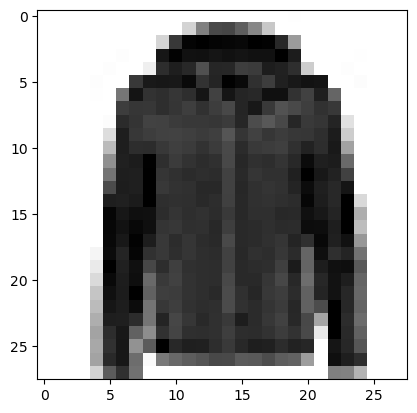

In [8]:
plt.imshow(X_train[0], cmap = "binary"); # Displays the first image in the training set.
# cmap ="binary": Specifies that the image should be displayed in black and white (i.e., binary) color scheme.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[0] # Contains the names of the different classes in the Fashion-MNIST dataset. 
# Each class represents a different type of clothing item, and is assigned a unique integer label between 0 and 9.

'T-shirt/top'

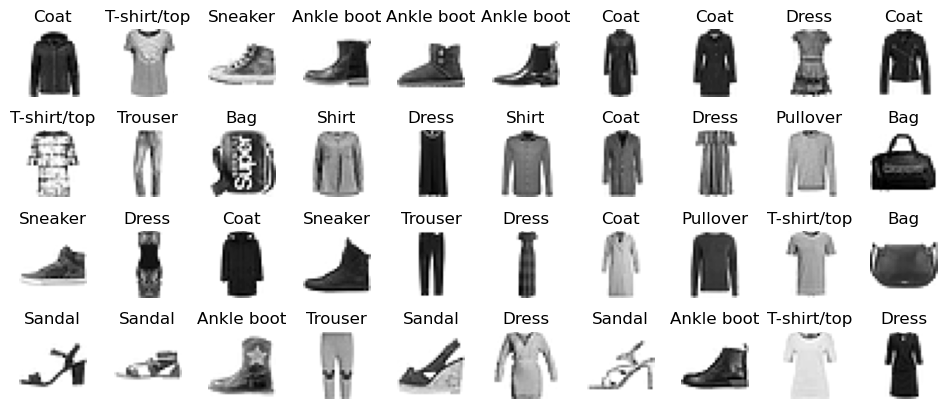

In [11]:
n_rows = 4 # Determine the number of rows in the grid of images.
n_cols = 10 # determine the number of columns in the grid of images.
plt.figure(figsize = (n_cols * 1.2, n_rows * 1.2)) # Sets the size of the figure 
for row in range(n_rows): # The nested for loops iterate through each cell in the grid.
    for col in range(n_cols):
        index = n_cols * row + col # Calculated as the linear index of the current cell
        plt.subplot(n_rows, n_cols, index + 1) # Selects the current cell for plotting
        plt.imshow(X_train[index], cmap = "binary") # Displays the corresponding image in the cell.
        plt.title(class_names[y_train[index]], fontsize = 12) # Adds the class name of the current image as a title to the cell
        plt.axis('off') # Removes the axis ticks and labels from the plot.
plt.subplots_adjust(wspace = 0.2, hspace = 0.5) # Adjusts the spacing between the cells in the grid
plt.show()

#### 1.2) Multi-layer Perception (Dense Neural Network)

In [12]:
model = keras.models.Sequential([ # A linear stack of layers, which consists of three fully connected layers and one input layer
    keras.layers.Flatten(input_shape = [28,28]), # Transforms the input images from a 2D array of shape (28, 28) to a 1D array of shape (784,). This layer does not have any parameters to learn, it just reshapes the input data.
    keras.layers.Dense(units = 300, activation = "relu"), # This layer learns 300 weights (parameters) for each input feature, and applies the rectified linear unit (ReLU) activation function to the output of each neuron. The ReLU activation function returns the maximum of 0 and its input, which introduces non-linearity into the model and helps the model to learn complex relationships between the input features and the output.
    keras.layers.Dense(units = 100, activation = "relu"), # Layer with 100 neurons and relu activation function. This layer learns 100 weights for each input feature and applies the ReLU activation function to the output of each neuron.
    keras.layers.Dense(units = 10,  activation = "softmax") # Last layer is a Dense layer with 10 neurons (one for each class) and softmax activation function. The softmax activation function computes a probability distribution over the 10 output classes, and ensures that the predicted probabilities sum up to 1. The output of this layer represents the model's predictions for each input image.
])

In [13]:
model.summary() 
# Prints a summary of the model architecture, including the number of parameters in each layer and the total number of parameters in the model. 
# It also displays the output shape of each layer.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Represent the number of parameters in each layer of the model
print( (784 + 1) * 300) # Second layer Dense has 784 * 300 + 300 = 235,500 parameters. The weight matrix has shape (784, 300) and there is one bias term for each of the 300 neurons in the layer.
print( (300 + 1) * 100 ) # = (300 * 100) + 100 = weight matrix + bias vector # The third layer Dense has 300 * 100 + 100 = 30,100 parameters. The weight matrix has shape (300, 100) and there is one bias term for each of the 100 neurons in the layer.
print( (100 + 1) * 10 ) # The last layer Dense has 100 * 10 + 10 = 1,010 parameters. The weight matrix has shape (100, 10) and there is one bias term for each of the 10 neurons in the layer.

# The calculations are based on the fact that each neuron in a fully connected layer has one bias term, and the weight matrix has shape (n_inputs, n_neurons), where n_inputs is the number of inputs to the layer (i.e., the output shape of the previous layer) and n_neurons is the number of neurons in the layer. 
# Therefore, the total number of parameters in a fully connected layer is (n_inputs + 1) * n_neurons, where +1 is for the bias term.

235500
30100
1010


In [15]:
weights, biases = model.get_layer("dense_1").get_weights()
# get_weights(): A method of a layer in Keras returns a list of two Numpy arrays: the weights and biases of the layer, in that order.
# model.get_layer("dense_1"): Returns the second Dense layer of the model (with 300 neurons and ReLU activation), and get_weights() returns a tuple (weights, biases) where weights is a (784, 300) Numpy array containing the weight matrix (i.e., the connection weights between the input layer and this layer), and biases is a (300,) Numpy array containing the bias terms (i.e., one bias per neuron in this layer).

In [17]:
#Returns the weights and biases
weights
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [18]:
model.compile(loss = "sparse_categorical_crossentropy", # as y is encoded as a vector of labels and not as a one hot matrix
              optimizer = "sgd",
              metrics = ["accuracy"])
# loss="sparse_categorical_crossentropy": This is the loss function used during training. Since y_train contains integer class labels (and not one-hot vectors), we use "sparse_categorical_crossentropy".
# optimizer="sgd": This is the optimization algorithm used during training. "sgd" stands for stochastic gradient descent, which is a popular and simple optimization algorithm.
# metrics=["accuracy"]: This is a list of metrics used to evaluate the model's performance during training and testing. Here, we are using the "accuracy" metric, which is a standard metric for classification tasks.

In [19]:
# The fit() method returns a History object that contains the training history of the model (e.g., loss and accuracy at each epoch)
fit_history = model.fit(x = X_train, y = y_train, # These are the input features and target labels used for training the model.
                        validation_data = (X_valid, y_valid), # This is the validation set used to evaluate the model's performance after each epoch of training. X_valid and y_valid are the input features and target labels for the validation set.
                        batch_size = 64, # This is the number of samples in each batch of training data.
                        epochs = 20) # This is the number of times the entire training dataset is passed through the model during training.

Epoch 1/20
860/860 [==============================] - 4s 3ms/step - loss: 0.8458 - accuracy: 0.7356 - val_loss: 0.6047 - val_accuracy: 0.7904
Epoch 2/20
860/860 [==============================] - 2s 3ms/step - loss: 0.5451 - accuracy: 0.8147 - val_loss: 0.5417 - val_accuracy: 0.8030
Epoch 3/20
860/860 [==============================] - 3s 3ms/step - loss: 0.4899 - accuracy: 0.8308 - val_loss: 0.4684 - val_accuracy: 0.8396
Epoch 4/20
860/860 [==============================] - 3s 3ms/step - loss: 0.4604 - accuracy: 0.8395 - val_loss: 0.5221 - val_accuracy: 0.8170
Epoch 5/20
860/860 [==============================] - 3s 3ms/step - loss: 0.4389 - accuracy: 0.8468 - val_loss: 0.4205 - val_accuracy: 0.8542
Epoch 6/20
860/860 [==============================] - 3s 4ms/step - loss: 0.4244 - accuracy: 0.8525 - val_loss: 0.4127 - val_accuracy: 0.8574
Epoch 7/20
860/860 [==============================] - 3s 4ms/step - loss: 0.4106 - accuracy: 0.8566 - val_loss: 0.4642 - val_accuracy: 0.8318
Epoch 

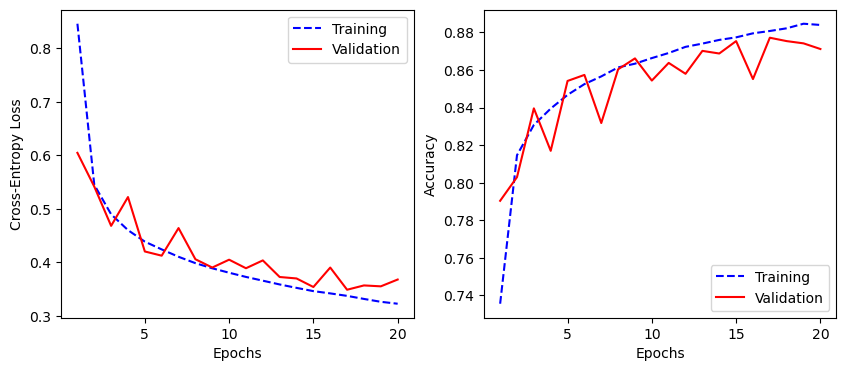

In [20]:
def plot_training(history_dict):
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b--', label = 'Training')
    plt.plot(epochs, val_loss, 'r-', label = 'Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'b--', label = 'Training')
    plt.plot(epochs, val_acc, 'r-', label = 'Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    
    plt.show()

plot_training(fit_history.history)

# The plot_training() function is used to plot the training and validation loss, as well as the training and validation accuracy, as a function of the number of epochs.
# The function takes in a dictionary that contains the training history, which is returned by the fit() method. 
# The keys of this dictionary are the metric names (e.g., 'loss', 'accuracy', 'val_loss', 'val_accuracy'), and the values are lists that contain the metric values at each epoch.
# The function first extracts the training and validation loss and accuracy from the history dictionary, and then plots these metrics using matplotlib. 
# The left plot shows the cross-entropy loss, while the right plot shows the accuracy. 
# The blue dashed line represents the training metrics, while the red solid line represents the validation metrics.
# The plot_training() function is called with the history attribute of the fit_history object, which contains the training history.

In [21]:
model.evaluate(X_test, y_test) # Used to evaluate the performance of the trained model on a test dataset.

313/313 [==============================] - 1s 2ms/step - loss: 78.8874 - accuracy: 0.8266


[78.88739776611328, 0.8266000151634216]

In [22]:
model.predict(X_valid) # Used to make predictions on a new set of inputs, given a trained model.

157/157 [==============================] - 0s 2ms/step


array([[5.8523710e-08, 1.5519985e-09, 1.5184339e-09, ..., 3.0779939e-03,
        1.3569216e-05, 9.9623579e-01],
       [9.9774712e-01, 8.4931358e-08, 8.1605860e-05, ..., 3.1732500e-10,
        4.7864687e-06, 1.6809022e-10],
       [3.4365118e-01, 3.7204064e-02, 5.6785569e-02, ..., 8.5028791e-04,
        8.4181493e-03, 1.1788743e-03],
       ...,
       [4.1688507e-04, 3.4389264e-05, 6.8587949e-05, ..., 3.5689685e-02,
        3.3154602e-03, 3.1598334e-03],
       [2.3387731e-03, 1.0705135e-04, 6.8154382e-03, ..., 3.6131263e-07,
        9.8303705e-01, 8.2391081e-09],
       [3.3995758e-03, 2.2874542e-02, 1.1491489e-03, ..., 1.7727927e-04,
        2.0197767e-03, 1.2652192e-04]], dtype=float32)

In [23]:
indices = [240, 108, 423] # Tests three samples from the test set
X_new = X_test[indices] # 3D index
y_new = y_test[indices]
y_pred = np.argmax(model.predict(X_new), axis = 1) # Used to make predictions on a new set of inputs, given a trained model.
print("Predicted classes:", y_pred)
print("True classes:", y_new)

1/1 [==============================] - 0s 82ms/step
Predicted classes: [5 9 5]
True classes: [5 9 5]


In [24]:
model.predict(X_new) # Used to make predictions on a new set of inputs, given a trained model.

1/1 [==============================] - 0s 20ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

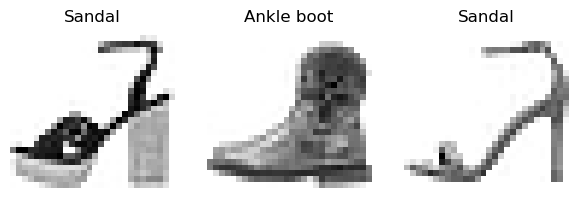

In [25]:
plt.figure(figsize = (7.2, 2.4)) # Creates a new figure with a width and a height in inches.
for index, image in enumerate(X_new): # Loops through each image in X_new along with its index.
    cls_nm = class_names[y_new[index]] # Class name for the true label of the image.
    plt.subplot(1, 3, index + 1) # Creates a subplot for the current image, with 1 row, 3 columns, and the given index.
    plt.imshow(image, cmap = "binary") # Displays the image in black and white binary format.
    plt.title(cls_nm, fontsize = 12) # Sets the title of the subplot to the true class name of the image.
    plt.axis('off') # Turns off the axis labels for the subplot.
plt.subplots_adjust(wspace = 0.2, hspace = 0.5) # Adjusts the spacing between subplots to improve readability.
plt.show()

#### 2) Controlling Dense Neural Networks

In [26]:
model.save("checkpoints/dense_nn.h5") # This line of code saves the trained model to a file named "dense_nn.h5" in a folder named "checkpoints" in the current working directory.

In [27]:
model_restored = keras.models.load_model("checkpoints/dense_nn.h5")
# The model is being restored from the saved model file "dense_nn.h5" using the load_model() function from the keras.models module. 
# This function creates a new instance of the Sequential model class and loads the model architecture and trained weights from the saved file. 
# The restored model can be used to make predictions on new data or to continue training from where it was left off.

In [28]:
model_restored.summary() # Summary of restored model 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath = "checkpoints/model_epoch={epoch:02d}_val_accuracy={val_accuracy:.2f}.h5")
# The purpose of this callback is to save the model's weights after each epoch to a file, in case the training process is interrupted or crashes, so that the training can be resumed from the point it left off.

history = model.fit(X_train, y_train, # These are the input features and target labels used for training the model.
                    validation_data=(X_valid, y_valid), # This is the validation set used to evaluate the model's performance after each epoch of training. X_valid and y_valid are the input features and target labels for the validation set.
                    batch_size = 64,  # This is the number of samples in each batch of training data.
                    epochs = 3, # This is the number of times the entire training dataset is passed through the model during training.
                    callbacks = [checkpoint_cb])
# careful: calling .fit() several times will continue the training each time

Epoch 1/3
860/860 [==============================] - 3s 3ms/step - loss: 0.3182 - accuracy: 0.8872 - val_loss: 0.3621 - val_accuracy: 0.8732
Epoch 2/3
860/860 [==============================] - 3s 3ms/step - loss: 0.3146 - accuracy: 0.8881 - val_loss: 0.3360 - val_accuracy: 0.8834
Epoch 3/3
860/860 [==============================] - 3s 3ms/step - loss: 0.3102 - accuracy: 0.8897 - val_loss: 0.3760 - val_accuracy: 0.8674


**Avoiding Overfitting**

* A useful strategy to avoid overfitting with neural networks is by using early stopping, i.e., interrupt the training when there is no improvement on the validation set for a number of epochs. When this happens, early stop allows you to roll back to the best model. Notice that early stop is also implemented as a `Keras` callback.

_Hint_: The number of epochs can be set to a large value since training will stop automatically when there is no more progress. In this case, there is no
need to restore the best model saved because the callback will keep track of the best weights and restore them for you at the end of training.

In [30]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True, verbose = 1)
# The EarlyStopping callback is defined with the patience parameter set to 5. 
# This means that training will be stopped if the validation loss does not improve for 5 consecutive epochs. 
# The restore_best_weights parameter is set to True, which means that the weights of the model with the best validation loss will be restored after training. 
# The verbose parameter is set to 1, which means that a message will be printed to the console when early stopping is triggered.

history = model.fit(X_train, y_train,  # These are the input features and target labels used for training the model.
                    validation_data = (X_valid, y_valid), # This is the validation set used to evaluate the model's performance after each epoch of training. X_valid and y_valid are the input features and target labels for the validation set.
                    batch_size = 64,  # This is the number of samples in each batch of training data.
                    epochs = 50, # This is the number of times the entire training dataset is passed through the model during training.
                    callbacks = [early_stopping_cb, checkpoint_cb]) # Parameter is set to a list containing the early_stopping_cb and checkpoint_cb callbacks

Epoch 1/50
860/860 [==============================] - 2s 3ms/step - loss: 0.3062 - accuracy: 0.8905 - val_loss: 0.3439 - val_accuracy: 0.8786
Epoch 2/50
860/860 [==============================] - 2s 3ms/step - loss: 0.3029 - accuracy: 0.8914 - val_loss: 0.3301 - val_accuracy: 0.8838
Epoch 3/50
860/860 [==============================] - 2s 3ms/step - loss: 0.2994 - accuracy: 0.8927 - val_loss: 0.3315 - val_accuracy: 0.8842
Epoch 4/50
860/860 [==============================] - 3s 3ms/step - loss: 0.2949 - accuracy: 0.8949 - val_loss: 0.3363 - val_accuracy: 0.8796
Epoch 5/50
860/860 [==============================] - 3s 3ms/step - loss: 0.2928 - accuracy: 0.8958 - val_loss: 0.3661 - val_accuracy: 0.8688
Epoch 6/50
860/860 [==============================] - 3s 3ms/step - loss: 0.2890 - accuracy: 0.8969 - val_loss: 0.3200 - val_accuracy: 0.8882
Epoch 7/50
860/860 [==============================] - 3s 3ms/step - loss: 0.2859 - accuracy: 0.8974 - val_loss: 0.3242 - val_accuracy: 0.8870
Epoch 

In neural networks there is high risk of overfitting the training data. Therefore, it is important to apply some form of regularization. A very popular one is the `dropout` which consists of dropping randomly a given percentage of nodes in some layers (during **training only**).

In [31]:
model_reg = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(units = 300, activation = "relu"),
    keras.layers.Dense(units = 100, activation = "relu"),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(units = 10,  activation = "softmax")
])

model_reg.compile(loss = "sparse_categorical_crossentropy",
                  optimizer = "sgd",
                  metrics = ["accuracy"])

# loss="sparse_categorical_crossentropy": This is the loss function used during training. Since y_train contains integer class labels (and not one-hot vectors), we use "sparse_categorical_crossentropy".
# optimizer="sgd": This is the optimization algorithm used during training. "sgd" stands for stochastic gradient descent, which is a popular and simple optimization algorithm.
# metrics=["accuracy"]: This is a list of metrics used to evaluate the model's performance during training and testing. Here, we are using the "accuracy" metric, which is a standard metric for classification tasks.

In [32]:
history = model_reg.fit(X_train, y_train,  # These are the input features and target labels used for training the model.
                    validation_data = (X_valid, y_valid), # This is the validation set used to evaluate the model's performance after each epoch of training. X_valid and y_valid are the input features and target labels for the validation set.
                    batch_size = 64,  # This is the number of samples in each batch of training data.
                    epochs = 10, # This is the number of times the entire training dataset is passed through the model during training.
                    callbacks = [early_stopping_cb, checkpoint_cb]) # Parameter is set to a list containing the early_stopping_cb and checkpoint_cb callbacks

Epoch 1/10
860/860 [==============================] - 3s 3ms/step - loss: 0.9522 - accuracy: 0.6881 - val_loss: 0.6130 - val_accuracy: 0.7936
Epoch 2/10
860/860 [==============================] - 3s 3ms/step - loss: 0.6164 - accuracy: 0.7895 - val_loss: 0.5157 - val_accuracy: 0.8256
Epoch 3/10
860/860 [==============================] - 3s 4ms/step - loss: 0.5435 - accuracy: 0.8144 - val_loss: 0.4763 - val_accuracy: 0.8420
Epoch 4/10
860/860 [==============================] - 3s 4ms/step - loss: 0.5042 - accuracy: 0.8255 - val_loss: 0.4488 - val_accuracy: 0.8474
Epoch 5/10
860/860 [==============================] - 3s 4ms/step - loss: 0.4766 - accuracy: 0.8353 - val_loss: 0.4266 - val_accuracy: 0.8548
Epoch 6/10
860/860 [==============================] - 3s 4ms/step - loss: 0.4569 - accuracy: 0.8403 - val_loss: 0.4160 - val_accuracy: 0.8592
Epoch 7/10
860/860 [==============================] - 3s 4ms/step - loss: 0.4419 - accuracy: 0.8441 - val_loss: 0.4099 - val_accuracy: 0.8584
Epoch 

In [33]:
model_reg.evaluate(X_test, y_test); # Used to evaluate the performance of the trained model on a test dataset.

313/313 [==============================] - 1s 2ms/step - loss: 61.4325 - accuracy: 0.8257


**Learning Rate and Optimization**

Finding a good learning rate is very important. If you set it much too high, training may diverge (as we discussed in “Gradient Descent”). If you set it too low, training will eventually converge to an optimum, but it will take a very long time. One of the easiest options is to use a constant learning rate. 

In [34]:
optimizer = keras.optimizers.SGD(learning_rate = 0.01) #0.01 0.001 0.8
# Defines an optimizer object for stochastic gradient descent (SGD) with a learning rate of 0.01.

model_reg.compile(loss = "sparse_categorical_crossentropy",
                  optimizer = optimizer,
                  metrics = ["accuracy"])

history = model_reg.fit(X_train, y_train,  # These are the input features and target labels used for training the model.
                    validation_data = (X_valid, y_valid), # This is the validation set used to evaluate the model's performance after each epoch of training. X_valid and y_valid are the input features and target labels for the validation set.
                    batch_size = 64,  # This is the number of samples in each batch of training data.
                    epochs = 7, # This is the number of times the entire training dataset is passed through the model during training.
                    callbacks = [early_stopping_cb, checkpoint_cb]) # Parameter is set to a list containing the early_stopping_cb and checkpoint_cb callbacks

Epoch 1/7
860/860 [==============================] - 3s 3ms/step - loss: 0.4000 - accuracy: 0.8596 - val_loss: 0.3809 - val_accuracy: 0.8666
Epoch 2/7
860/860 [==============================] - 3s 3ms/step - loss: 0.3925 - accuracy: 0.8617 - val_loss: 0.3722 - val_accuracy: 0.8692
Epoch 3/7
860/860 [==============================] - 3s 4ms/step - loss: 0.3843 - accuracy: 0.8639 - val_loss: 0.3658 - val_accuracy: 0.8738
Epoch 4/7
860/860 [==============================] - 3s 3ms/step - loss: 0.3803 - accuracy: 0.8656 - val_loss: 0.3677 - val_accuracy: 0.8702
Epoch 5/7
860/860 [==============================] - 3s 4ms/step - loss: 0.3731 - accuracy: 0.8672 - val_loss: 0.3751 - val_accuracy: 0.8666
Epoch 6/7
860/860 [==============================] - 3s 3ms/step - loss: 0.3693 - accuracy: 0.8699 - val_loss: 0.3948 - val_accuracy: 0.8532
Epoch 7/7
860/860 [==============================] - 3s 4ms/step - loss: 0.3639 - accuracy: 0.8699 - val_loss: 0.3579 - val_accuracy: 0.8742


Another issue with training neural networks is the presence of local loss minima, as the optimization problem with so many weights is non-convex. The gradient descent procedure can then get "stuck" in these local minima, although better solutions might exist. On top of tuning the learning rate, adding momentum during the gradient descent steps can help avoiding those local minima. The simplest form of momentum can be achieved by setting a positive `momentum` value in `keras.optimizers.SGD`. However, more complex momentum methods for stochastic gradient descent have since then been developed, like the now very popular `Adam` moment-based stochastic gradient descent algorithm.

In [35]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
# Defines an optimizer object for stochastic gradient descent (SGD) with a learning rate of 0.01.

model_reg.compile(loss = "sparse_categorical_crossentropy",
                  optimizer = optimizer,
                  metrics = ["accuracy"])

history = model_reg.fit(X_train, y_train,
                        validation_data=(X_valid, y_valid), 
                        batch_size = 64,
                        epochs = 50, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/50
860/860 [==============================] - 4s 4ms/step - loss: 0.4261 - accuracy: 0.8438 - val_loss: 0.3732 - val_accuracy: 0.8654
Epoch 2/50
860/860 [==============================] - 4s 4ms/step - loss: 0.3657 - accuracy: 0.8651 - val_loss: 0.3319 - val_accuracy: 0.8770
Epoch 3/50
860/860 [==============================] - 4s 4ms/step - loss: 0.3340 - accuracy: 0.8757 - val_loss: 0.3289 - val_accuracy: 0.8846
Epoch 4/50
860/860 [==============================] - 4s 5ms/step - loss: 0.3149 - accuracy: 0.8832 - val_loss: 0.3048 - val_accuracy: 0.8920
Epoch 5/50
860/860 [==============================] - 4s 4ms/step - loss: 0.2993 - accuracy: 0.8888 - val_loss: 0.3186 - val_accuracy: 0.8820
Epoch 6/50
860/860 [==============================] - 4s 4ms/step - loss: 0.2863 - accuracy: 0.8927 - val_loss: 0.3395 - val_accuracy: 0.8782
Epoch 7/50
860/860 [==============================] - 4s 4ms/step - loss: 0.2718 - accuracy: 0.8979 - val_loss: 0.3129 - val_accuracy: 0.8886
Epoch 

In [36]:
model_reg.evaluate(X_test, y_test) # Used to evaluate the performance of the trained model on a test dataset.

313/313 [==============================] - 1s 2ms/step - loss: 53.1868 - accuracy: 0.8605


[53.186805725097656, 0.8604999780654907]